# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

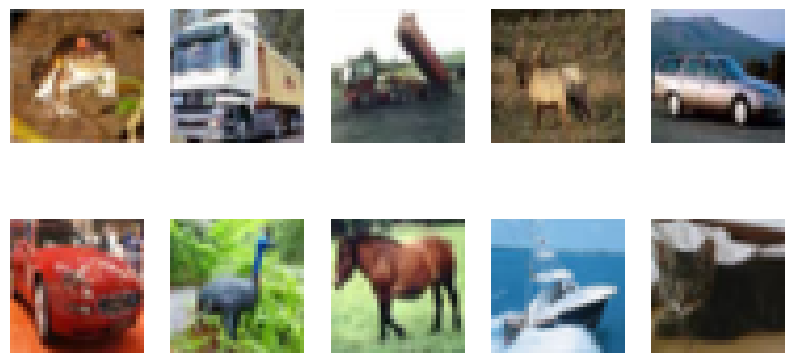

In [5]:
# Your code here :
plt.figure(figsize=(10,5))
for i in range (10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()
#step2
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)
#step3
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
# Your code here :
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Use Input layer for shape
    layers.Conv2D(32, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),  
    layers.Flatten(),  
    layers.Dense(100, activation='relu'),  
    layers.Dense(10, activation='softmax')  
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
from keras.optimizers import SGD
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.1335 - loss: 2.2852 - val_accuracy: 0.2238 - val_loss: 2.1927
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.2462 - loss: 2.1565 - val_accuracy: 0.2874 - val_loss: 2.0574
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2870 - loss: 2.0305 - val_accuracy: 0.2929 - val_loss: 1.9767
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.3170 - loss: 1.9524 - val_accuracy: 0.3274 - val_loss: 1.9249
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3306 - loss: 1.9159 - val_accuracy: 0.3445 - val_loss: 1.8873
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.3477 - loss: 1.8725 - val_accuracy: 0.3441 - val_loss: 1.8706
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3621 - loss: 1.8405 - val_accuracy: 0.3622 - val_loss: 1.8311
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.3673 - loss: 1.8246 - val_accuracy: 0.3768 - v

*   Plot the cross entropy loss curve and the accuracy curve

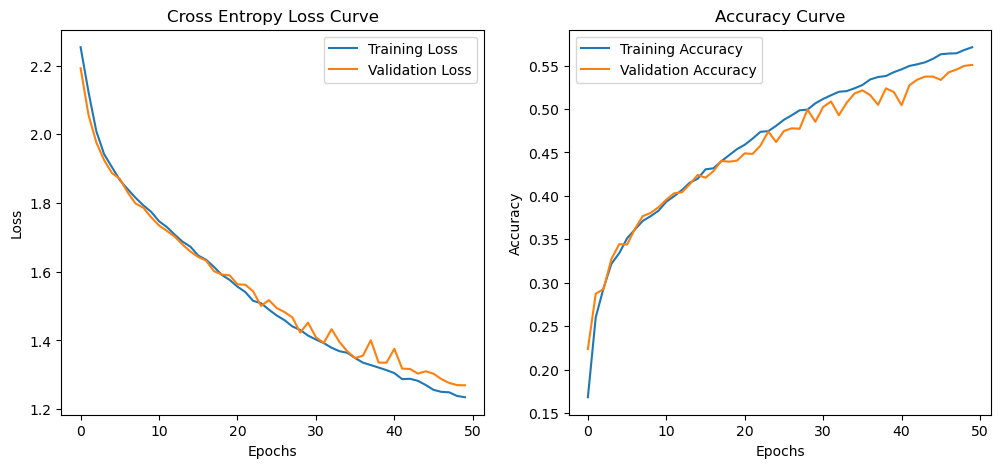

In [17]:
# Your code here :
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#loss curve

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(loss, label='Training Loss')

plt.plot(val_loss, label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Cross Entropy Loss Curve')

plt.legend()

#accuracy curve 

plt.subplot(1, 2, 2)

plt.plot(accuracy, label='Training Accuracy')

plt.plot(val_accuracy, label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy Curve')

plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [21]:
from keras.backend import clear_session
clear_session()

In [25]:
# Your code here :
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Use Input layer for shape
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [ ]:
# Your code here :
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss Curve')

plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy Curve')

plt.legend()



plt.show()

**Comment on the observation**

*If a deeper model is overfitting, it may achieve high training accuracy, but the validation accuracy will likely be low.*


*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Your code here :
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Comment here**

*look for the high values on the diagonal*


*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :
import torch
# Assuming you have a trained model and test_loader
correct = 0
total = 0

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for inference

with torch.no_grad():

    for images, labels in test_loader:

        images, labels = images.to(device), labels.to(device)  # Move to GPU if available

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()
# Compute accuracy
accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
import torch

import torch.nn as nn



class VGG(nn.Module):

    def __init__(self, num_classes=10):  

        super(VGG, self).__init__()

        self.features = nn.Sequential(

            nn.Conv2d(3, 64, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),

            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

        )

        self.classifier = nn.Sequential(

            nn.Linear(256 * 8 * 8, 128),  # افتراض أن الإدخال بحجم 64x64

            nn.ReLU(inplace=True),

            nn.Linear(128, num_classes)

        )

    def forward(self, x):

        x = self.features(x)

        x = torch.flatten(x, 1)  # Flatten

        x = self.classifier(x)

        return x

model = VGG(num_classes=10)

print(model)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

- Activation functions introduce non-linearity into the network, allowing it to learn complex patterns and relationships in the data. Without activation functions, the network would behave like a linear model, limiting its ability to capture intricate structures. They also help in controlling the output of neurons, enabling the model to decide whether to activate a neuron based on the input received.

2 - Key Differences between sigmoid and softmax:

- Output Range: The sigmoid activation function outputs values between 0 and 1, making it suitable for binary classification tasks. In contrast, softmax outputs a probability distribution over multiple classes, where the sum of all outputs equals 1.
- Use Case: Sigmoid is typically used for binary classification problems, while softmax is used for multi-class classification problems.
- Gradient Behavior: Sigmoid can suffer from vanishing gradients when inputs are far from zero, which can slow down training. Softmax, on the other hand, normalizes the output, allowing for better gradient flow in multi-class scenarios.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

- Application: Categorical crossentropy is used for multi-class classification problems where each instance belongs to one of multiple classes. Binary crossentropy is used for binary classification problems where each instance belongs to one of two classes.
- Output Format: Categorical crossentropy expects the model's output to be a probability distribution (e.g., softmax output), while binary crossentropy expects a single probability value (e.g., sigmoid output).
- Label Encoding: Categorical crossentropy typically requires one-hot encoded labels, whereas binary crossentropy uses binary labels (0 or 1).
